In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

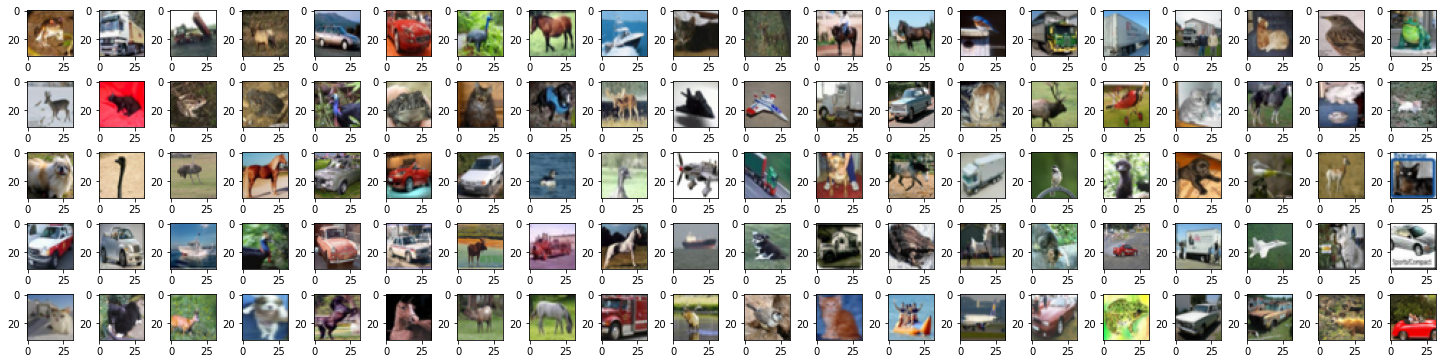

In [ ]:
rows, cols = 5, 20
fig, axs = plt.subplots(rows, cols, figsize = (20, 5))
for i in range(rows):
    for j in range(cols):
        axs[i][j].imshow(x_train[cols*i + j])
fig.tight_layout(pad=0.5)
plt.show()

In [ ]:
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

NUM_CLASSES=10
y_train=to_categorical(y_train, NUM_CLASSES)
y_test=to_categorical(y_test, NUM_CLASSES)

mere FC

In [ ]:
#using Sequential Model
model_seq=Sequential()
model_seq.add(Flatten(input_shape=(32, 32, 3)))
model_seq.add(Dense(200, activation="relu"))
model_seq.add(Dense(10, activation="softmax"))

In [ ]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 616,610
Trainable params: 616,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=Adam(lr=0.005)
model_seq.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model_seq.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0928 - accuracy: 0.2591
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9022 - accuracy: 0.2854
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8912 - accuracy: 0.2913
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8736 - accuracy: 0.3012
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8670 - accuracy: 0.3046
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8643 - accuracy: 0.3076
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8518 - accuracy: 0.3158
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8444 - accuracy: 0.3213
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8427 - accuracy: 0.3197
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.841

In [ ]:
model_seq.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8663 - accuracy: 0.2982


[1.8663462400436401, 0.29820001125335693]

In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model_seq.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

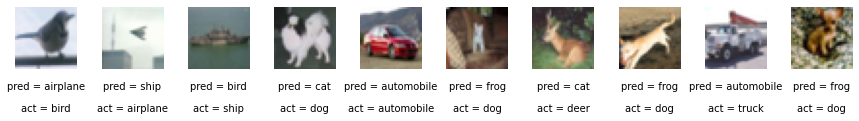

In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [ ]:
# using functional API
input_layer=Input(shape=(32, 32, 3))
x=Flatten()(input_layer)
x=Dense(200, activation="relu")(x)
output_layer=Dense(10, activation="softmax")(x)
model_func=Model(input_layer, output_layer)

In [ ]:
model_func.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2010      
Total params: 616,610
Trainable params: 616,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=Adam(lr=0.005)
model_func.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model_func.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0906 - accuracy: 0.2296
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9422 - accuracy: 0.2733
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9150 - accuracy: 0.2860
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9052 - accuracy: 0.2869
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8991 - accuracy: 0.2864
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8932 - accuracy: 0.2895
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8934 - accuracy: 0.2910
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8876 - accuracy: 0.2923
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8852 - accuracy: 0.2910
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.885

In [ ]:
model_func.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.8884 - accuracy: 0.2939


[1.8884345293045044, 0.2939000129699707]

very simple CNN

In [ ]:
input_layer=Input(shape=(32, 32, 3))
x=Conv2D(filters=10, kernel_size=(4, 4), strides=2, padding="same")(input_layer)
x=Conv2D(filters=20, kernel_size=(3, 3), strides=2, padding="same")(x)
x=Flatten()(x)
output_layer=Dense(10, activation="softmax")(x)
model_cnn=Model(input_layer, output_layer)

In [ ]:
model_cnn.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=Adam(lr=0.0005)
model_cnn.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model_cnn.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8458 - accuracy: 0.3528
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7345 - accuracy: 0.4046
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7150 - accuracy: 0.4169
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7068 - accuracy: 0.4189
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6989 - accuracy: 0.4207
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6914 - accuracy: 0.4234
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6874 - accuracy: 0.4274
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6823 - accuracy: 0.4279
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6783 - accuracy: 0.4295
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

In [ ]:
model_cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.7224 - accuracy: 0.4025


[1.7224475145339966, 0.4025000035762787]

improved ver of CNN

In [ ]:
input_layer=Input(shape=(32, 32, 3))
x=Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Flatten()(x)

x=Dense(128)(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)
x=Dropout(rate=0.5)(x)

output_layer=Dense(10, activation="softmax")(x)
model_cnn2=Model(input_layer, output_layer)

In [ ]:
model_cnn2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0     

CPU

In [ ]:
opt=Adam(lr=0.0005)
model_cnn2.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model_cnn2.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1563/1563 [==============================] - 156s 99ms/step - loss: 1.5622 - accuracy: 0.4537
Epoch 2/10
1563/1563 [==============================] - 155s 99ms/step - loss: 1.1642 - accuracy: 0.5879
Epoch 3/10
1563/1563 [==============================] - 155s 99ms/step - loss: 1.0098 - accuracy: 0.6481
Epoch 4/10
1563/1563 [==============================] - 154s 99ms/step - loss: 0.9255 - accuracy: 0.6748
Epoch 5/10
1563/1563 [==============================] - 155s 99ms/step - loss: 0.8596 - accuracy: 0.7015
Epoch 6/10
1563/1563 [==============================] - 155s 99ms/step - loss: 0.8136 - accuracy: 0.7176
Epoch 7/10
1563/1563 [==============================] - 156s 100ms/step - loss: 0.7691 - accuracy: 0.7316
Epoch 8/10
1563/1563 [==============================] - 156s 100ms/step - loss: 0.7305 - accuracy: 0.7429
Epoch 9/10
1563/1563 [==============================] - 156s 100ms/step - loss: 0.6911 - accuracy: 0.7591
Epoch 10/10
1563/1563 [=============================

In [ ]:
model_cnn2.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 7s 714ms/step - loss: 0.8289 - accuracy: 0.7206


[0.8288829922676086, 0.7206000089645386]

GPU

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17058917416225211038, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15422135225327279195
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
opt=Adam(lr=0.0005)
model_cnn2.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model_cnn2.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1563/1563 [==============================] - 49s 11ms/step - loss: 1.5423 - accuracy: 0.4576
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1289 - accuracy: 0.6017
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0037 - accuracy: 0.6492
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9300 - accuracy: 0.6751
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8666 - accuracy: 0.6970
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8137 - accuracy: 0.7178
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7726 - accuracy: 0.7286
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7352 - accuracy: 0.7448
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6921 - accuracy: 0.7587
Epoch 10/10
1563/1563 [==============================] - 16s 10m

In [ ]:
model_cnn2.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 46ms/step - loss: 0.8136 - accuracy: 0.7291


[0.8135631084442139, 0.7290999889373779]

In [ ]:
class myCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,3)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        self.flatten=nn.Flatten()
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x=self.flatten(x)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [ ]:
input_layer=Input(shape=(32, 32, 3))
x=Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Flatten()(x)

x=Dense(128)(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)
x=Dropout(rate=0.5)(x)

output_layer=Dense(10, activation="softmax")(x)
model_cnn2=Model(input_layer, output_layer)